Identify the data needed within the Zillow csv

In [83]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts






In [84]:
#pull necessary csv "../Resources/Median House Price.csv"
csv_path = "Resources/Median House Price.csv"
house_df = pd.read_csv(csv_path)
house_df
#import csv as dataframe

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,102001,0,United States,Country,NaN,"$107,630.00","$107,657.00","$107,707.00","$107,834.00","$107,977.00",...,247737,248625,249639,250802,252042,253216,254423,255872,257736,259906
1,394913,1,"New York, NY",Msa,NY,"$187,842.00","$187,403.00","$187,125.00","$186,592.00","$186,274.00",...,479999,480758,481745,482804,484104,485517,487279,489670,492875,497090
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,"$183,929.00","$184,185.00","$184,205.00","$184,312.00","$184,286.00",...,671796,675183,680320,685503,689705,691229,692332,696613,703740,711361
3,394463,3,"Chicago, IL",Msa,IL,"$164,647.00","$164,345.00","$163,946.00","$163,493.00","$162,886.00",...,245373,245631,246017,246628,247155,247719,248421,249650,251298,253512
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,"$114,406.00","$114,471.00","$114,634.00","$114,962.00","$115,314.00",...,260294,260750,261428,262440,263584,264699,265992,267485,269183,270907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,394767,929,"Lamesa, TX",Msa,TX,$nan,$nan,$nan,$nan,$nan,...,75408,75568,75681,75786,75968,76213,76503,76738,76975,77216
910,753874,930,"Craig, CO",Msa,CO,"$60,501.00","$60,725.00","$60,961.00","$61,420.00","$61,747.00",...,187489,187062,186934,186942,187037,187109,187262,187332,187393,187430
911,394968,931,"Pecos, TX",Msa,TX,$nan,$nan,$nan,$nan,$nan,...,124046,125836,127175,128373,128879,129605,130574,131262,131311,130703
912,395188,932,"Vernon, TX",Msa,TX,$nan,$nan,$nan,$nan,$nan,...,69702,69630,69495,69361,69277,69276,69229,69236,69248,69306


In [85]:
#clean out NaN values (df.dropna(how='any'))

#clean_house_df = house_df.dropna(how="any")
clean_house_df = house_df.dropna(subset=['RegionName', "1/31/2009","2/28/2009","3/31/2009","4/30/2009","5/31/2009","6/30/2009","7/31/2009","8/31/2009","9/30/2009","10/31/2009","11/30/2009","12/31/2009",
                            "1/31/2010","2/28/2010","3/31/2010","4/30/2010","5/31/2010","6/30/2010","7/31/2010","8/31/2010","9/30/2010","10/31/2010","11/30/2010","12/31/2010",
                            "1/31/2011","2/28/2011","3/31/2011","4/30/2011","5/31/2011","6/30/2011","7/31/2011","8/31/2011","9/30/2011","10/31/2011","11/30/2011","12/31/2011",
                            "1/31/2012","2/29/2012","3/31/2012","4/30/2012","5/31/2012","6/30/2012","7/31/2012","8/31/2012","9/30/2012","10/31/2012","11/30/2012","12/31/2012",
                            "1/31/2013","2/28/2013","3/31/2013","4/30/2013","5/31/2013","6/30/2013","7/31/2013","8/31/2013","9/30/2013","10/31/2013","11/30/2013","12/31/2013",
                            "1/31/2014","2/28/2014","3/31/2014","4/30/2014","5/31/2014","6/30/2014","7/31/2014","8/31/2014","9/30/2014","10/31/2014","11/30/2014","12/31/2014",
                            "1/31/2015","2/28/2015","3/31/2015","4/30/2015","5/31/2015","6/30/2015","7/31/2015","8/31/2015","9/30/2015","10/31/2015","11/30/2015","12/31/2015",
                            "1/31/2016","2/29/2016","3/31/2016","4/30/2016","5/31/2016","6/30/2016","7/31/2016","8/31/2016","9/30/2016","10/31/2016","11/30/2016","12/31/2016",
                            "1/31/2017","2/28/2017","3/31/2017","4/30/2017","5/31/2017","6/30/2017","7/31/2017","8/31/2017","9/30/2017","10/31/2017","11/30/2017","12/31/2017",
                            "1/31/2018","2/28/2018","3/31/2018","4/30/2018","5/31/2018","6/30/2018","7/31/2018","8/31/2018","9/30/2018","10/31/2018","11/30/2018","12/31/2018",
                            "1/31/2019","2/28/2019","3/31/2019","4/30/2019","5/31/2019","6/30/2019","7/31/2019","8/31/2019","9/30/2019","10/31/2019","11/30/2019","12/31/2019",
                            "1/31/2020","2/29/2020","3/31/2020","4/30/2020","5/31/2020","6/30/2020","7/31/2020","8/31/2020","9/30/2020"])
clean_house_df 


#print dataframe

clean_house_df
#clean dataframe, only need years 2009+, state name

#new_df = clean_house_df.loc[:,"StateName,1/31/2009":"9/30/2020",]

new_df = clean_house_df[["StateName","1/31/2009","2/28/2009","3/31/2009","4/30/2009","5/31/2009","6/30/2009","7/31/2009","8/31/2009","9/30/2009","10/31/2009","11/30/2009","12/31/2009",
                            "1/31/2010","2/28/2010","3/31/2010","4/30/2010","5/31/2010","6/30/2010","7/31/2010","8/31/2010","9/30/2010","10/31/2010","11/30/2010","12/31/2010",
                            "1/31/2011","2/28/2011","3/31/2011","4/30/2011","5/31/2011","6/30/2011","7/31/2011","8/31/2011","9/30/2011","10/31/2011","11/30/2011","12/31/2011",
                            "1/31/2012","2/29/2012","3/31/2012","4/30/2012","5/31/2012","6/30/2012","7/31/2012","8/31/2012","9/30/2012","10/31/2012","11/30/2012","12/31/2012",
                            "1/31/2013","2/28/2013","3/31/2013","4/30/2013","5/31/2013","6/30/2013","7/31/2013","8/31/2013","9/30/2013","10/31/2013","11/30/2013","12/31/2013",
                            "1/31/2014","2/28/2014","3/31/2014","4/30/2014","5/31/2014","6/30/2014","7/31/2014","8/31/2014","9/30/2014","10/31/2014","11/30/2014","12/31/2014",
                            "1/31/2015","2/28/2015","3/31/2015","4/30/2015","5/31/2015","6/30/2015","7/31/2015","8/31/2015","9/30/2015","10/31/2015","11/30/2015","12/31/2015",
                            "1/31/2016","2/29/2016","3/31/2016","4/30/2016","5/31/2016","6/30/2016","7/31/2016","8/31/2016","9/30/2016","10/31/2016","11/30/2016","12/31/2016",
                            "1/31/2017","2/28/2017","3/31/2017","4/30/2017","5/31/2017","6/30/2017","7/31/2017","8/31/2017","9/30/2017","10/31/2017","11/30/2017","12/31/2017",
                            "1/31/2018","2/28/2018","3/31/2018","4/30/2018","5/31/2018","6/30/2018","7/31/2018","8/31/2018","9/30/2018","10/31/2018","11/30/2018","12/31/2018",
                            "1/31/2019","2/28/2019","3/31/2019","4/30/2019","5/31/2019","6/30/2019","7/31/2019","8/31/2019","9/30/2019","10/31/2019","11/30/2019","12/31/2019",
                            "1/31/2020","2/29/2020","3/31/2020","4/30/2020","5/31/2020","6/30/2020","7/31/2020","8/31/2020","9/30/2020"]]

                        
pd.options.display.float_format = '${:,.2f}'.format

new_df


,StateName,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,NaN,"$187,976.00","$186,415.00","$184,912.00","$183,448.00","$182,014.00","$180,785.00","$179,835.00","$179,042.00","$178,362.00",...,247737,248625,249639,250802,252042,253216,254423,255872,257736,259906
1,NY,"$427,033.00","$423,196.00","$419,570.00","$416,142.00","$413,528.00","$410,668.00","$408,160.00","$405,503.00","$403,720.00",...,479999,480758,481745,482804,484104,485517,487279,489670,492875,497090
2,CA,"$437,562.00","$433,213.00","$429,993.00","$426,778.00","$423,950.00","$421,358.00","$420,187.00","$420,215.00","$421,197.00",...,671796,675183,680320,685503,689705,691229,692332,696613,703740,711361
3,IL,"$242,334.00","$239,308.00","$235,943.00","$233,874.00","$230,841.00","$228,761.00","$226,923.00","$225,491.00","$223,448.00",...,245373,245631,246017,246628,247155,247719,248421,249650,251298,253512
4,TX,"$154,006.00","$154,339.00","$154,781.00","$154,868.00","$154,818.00","$154,580.00","$154,501.00","$154,395.00","$154,547.00",...,260294,260750,261428,262440,263584,264699,265992,267485,269183,270907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,TX,"$61,688.00","$61,149.00","$61,020.00","$60,955.00","$60,598.00","$60,100.00","$59,400.00","$58,999.00","$58,642.00",...,91027,90905,90673,90661,90965,91481,91978,92335,92363,92602
909,TX,"$44,748.00","$44,749.00","$44,764.00","$44,707.00","$44,718.00","$44,495.00","$44,269.00","$44,018.00","$43,959.00",...,75408,75568,75681,75786,75968,76213,76503,76738,76975,77216
910,CO,"$139,820.00","$139,649.00","$139,471.00","$139,302.00","$139,122.00","$138,893.00","$138,661.00","$138,286.00","$137,924.00",...,187489,187062,186934,186942,187037,187109,187262,187332,187393,187430
912,TX,"$50,256.00","$50,244.00","$50,250.00","$50,218.00","$50,187.00","$50,122.00","$50,058.00","$49,938.00","$49,705.00",...,69702,69630,69495,69361,69277,69276,69229,69236,69248,69306


In [86]:
copy_df = new_df.copy()
new_df["Summary"] = new_df.mean(axis=1)
pd.options.display.float_format = '${:,.2f}'.format
new_df








<ipython-input-86-6532af20af02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Summary"] = new_df.mean(axis=1)


,StateName,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,...,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,Summary
0,NaN,"$187,976.00","$186,415.00","$184,912.00","$183,448.00","$182,014.00","$180,785.00","$179,835.00","$179,042.00","$178,362.00",...,248625,249639,250802,252042,253216,254423,255872,257736,259906,"$198,935.96"
1,NY,"$427,033.00","$423,196.00","$419,570.00","$416,142.00","$413,528.00","$410,668.00","$408,160.00","$405,503.00","$403,720.00",...,480758,481745,482804,484104,485517,487279,489670,492875,497090,"$421,303.98"
2,CA,"$437,562.00","$433,213.00","$429,993.00","$426,778.00","$423,950.00","$421,358.00","$420,187.00","$420,215.00","$421,197.00",...,675183,680320,685503,689705,691229,692332,696613,703740,711361,"$528,042.77"
3,IL,"$242,334.00","$239,308.00","$235,943.00","$233,874.00","$230,841.00","$228,761.00","$226,923.00","$225,491.00","$223,448.00",...,245631,246017,246628,247155,247719,248421,249650,251298,253512,"$216,025.67"
4,TX,"$154,006.00","$154,339.00","$154,781.00","$154,868.00","$154,818.00","$154,580.00","$154,501.00","$154,395.00","$154,547.00",...,260750,261428,262440,263584,264699,265992,267485,269183,270907,"$192,683.70"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,TX,"$61,688.00","$61,149.00","$61,020.00","$60,955.00","$60,598.00","$60,100.00","$59,400.00","$58,999.00","$58,642.00",...,90905,90673,90661,90965,91481,91978,92335,92363,92602,"$72,220.74"
909,TX,"$44,748.00","$44,749.00","$44,764.00","$44,707.00","$44,718.00","$44,495.00","$44,269.00","$44,018.00","$43,959.00",...,75568,75681,75786,75968,76213,76503,76738,76975,77216,"$55,745.48"
910,CO,"$139,820.00","$139,649.00","$139,471.00","$139,302.00","$139,122.00","$138,893.00","$138,661.00","$138,286.00","$137,924.00",...,187062,186934,186942,187037,187109,187262,187332,187393,187430,"$163,212.13"
912,TX,"$50,256.00","$50,244.00","$50,250.00","$50,218.00","$50,187.00","$50,122.00","$50,058.00","$49,938.00","$49,705.00",...,69630,69495,69361,69277,69276,69229,69236,69248,69306,"$57,693.56"


In [94]:


state_df = new_df.groupby("StateName").agg("mean")
pd.options.display.float_format = '${:,.2f}'.format

state_df


#state_mean = new_df["Sum"].mean()
#new_df["Median House Price"] = state_mean
#new_df


#change index to state name

#Add the median price into a column
#


#calculate average of each state over time

#new_df



,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,...,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,Summary
StateName,,,,,,,,,,,,,,,,,,,,,
AK,"$266,718.50","$266,578.50","$266,538.00","$266,608.75","$266,188.50","$265,797.25","$265,269.25","$264,715.50","$264,346.25","$263,883.00",...,"$315,077.75","$314,744.75","$314,234.50","$313,167.00","$312,957.75","$312,711.75","$312,903.00","$313,092.50","$313,581.25","$282,950.94"
AL,"$119,441.15","$119,130.65","$118,790.75","$118,396.95","$117,862.35","$117,278.85","$116,644.05","$116,097.75","$115,549.65","$115,064.75",...,"$130,059.05","$130,675.30","$131,316.95","$131,982.50","$132,732.35","$133,541.15","$134,368.20","$135,289.15","$136,354.75","$114,062.33"
AR,"$90,394.05","$90,106.32","$89,753.37","$89,408.95","$89,135.68","$88,964.68","$88,768.26","$88,482.11","$88,180.37","$87,888.05",...,"$107,918.53","$108,246.68","$108,597.42","$108,933.26","$109,204.53","$109,525.32","$109,881.95","$110,276.21","$110,685.05","$93,476.72"
AZ,"$188,815.00","$186,882.50","$184,801.10","$181,958.90","$178,939.60","$176,372.30","$174,000.60","$171,516.00","$169,079.20","$167,036.00",...,"$237,613.90","$239,048.10","$240,577.60","$242,356.90","$244,068.80","$245,658.60","$247,403.60","$249,593.70","$252,346.00","$184,094.86"
CA,"$297,412.82","$293,679.82","$289,793.64","$286,248.67","$283,193.94","$281,002.64","$279,562.94","$277,955.55","$276,514.64","$275,767.82",...,"$451,483.70","$453,495.94","$455,799.64","$457,628.48","$459,212.42","$460,913.61","$464,141.91","$468,898.52","$474,383.79","$348,754.35"
CO,"$260,109.50","$259,306.19","$258,383.62","$257,457.25","$256,806.31","$256,420.56","$255,995.69","$255,315.06","$254,208.38","$253,225.88",...,"$387,220.06","$387,980.25","$388,921.44","$389,798.06","$390,921.19","$392,098.44","$393,440.62","$395,183.06","$397,341.50","$298,386.25"
CT,"$307,567.80","$305,848.20","$303,683.20","$301,294.00","$298,279.40","$295,797.40","$293,589.60","$292,604.20","$291,396.00","$290,877.40",...,"$275,234.40","$276,000.20","$276,908.80","$277,704.80","$278,831.00","$280,712.60","$283,319.80","$286,674.80","$290,610.80","$268,601.06"
DC,"$352,985.00","$348,427.00","$344,218.00","$340,797.00","$338,586.00","$337,220.00","$336,464.00","$335,587.00","$334,582.00","$334,078.00",...,"$435,044.00","$436,124.00","$437,577.00","$439,632.00","$441,727.00","$444,179.00","$447,399.00","$451,030.00","$455,038.00","$376,548.11"
DE,"$249,384.00","$247,632.00","$246,491.00","$244,821.50","$243,019.00","$241,136.00","$239,969.00","$239,057.00","$238,087.00","$236,646.50",...,"$245,430.00","$246,630.00","$247,901.50","$249,247.00","$250,408.00","$251,694.50","$253,193.00","$254,877.50","$256,916.00","$223,514.83"


In [95]:
final_df = state_df[["Summary"]]
pd.options.display.float_format = '${:,.2f}'.format

final_df


,Summary
StateName,
AK,"$282,950.94"
AL,"$114,062.33"
AR,"$93,476.72"
AZ,"$184,094.86"
CA,"$348,754.35"
CO,"$298,386.25"
CT,"$268,601.06"
DC,"$376,548.11"
DE,"$223,514.83"


In [96]:
#identify 5 highest average housing price (sort)

top_10 = final_df.nlargest(10, ['Summary']) 
top_10

 

,Summary
StateName,
HI,"$560,628.48"
DC,"$376,548.11"
CA,"$348,754.35"
MA,"$338,667.97"
CO,"$298,386.25"
AK,"$282,950.94"
RI,"$269,224.62"
CT,"$268,601.06"
UT,"$267,930.70"


In [97]:
#identify 5 lowest average housing price
low_10 = final_df.nsmallest(10, ['Summary'])
low_10

,Summary
StateName,
WV,"$88,171.84"
OK,"$89,326.96"
AR,"$93,476.72"
IL,"$102,721.62"
OH,"$105,576.79"
MS,"$106,568.96"
KY,"$107,228.51"
IN,"$109,457.89"
GA,"$109,799.02"


In [98]:
#Visualizations

#bar graph, country vs all




In [99]:
#bar graph, top 10
x_axis = np.arange(len(top_10))
tick_locations = [value for value in x_axis]
plt.ylim(0, max(top_10)+5000)

top_10.plot(kind="bar", figsize=(15,5))

# Set a title for the chart
plt.title("Most Expensive States to Live in by Median House Price")

plt.show()
plt.tight_layout()




TypeError: can only concatenate str (not "int") to str

TypeError: only size-1 arrays can be converted to Python scalars

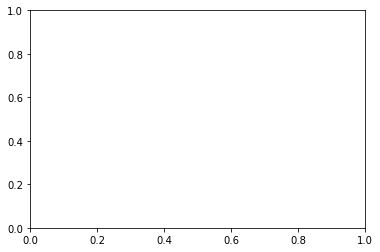

In [100]:
#bar graph, bottom 10

#bar graph, top 10

#tick_locations = [value for value in x_axis]

#low_10.plot(kind="bar", figsize=(15,5))

# Set a title for the chart
#plt.title("Most Expensive States to Live in by Median House Price")

#plt.show()
#plt.tight_layout()


